In [370]:
# It is quite frustrating but VS code wont reload imports without these comments
%reload_ext autoreload
%autoreload 2
# You may could remove them... Not sure.

import random
from cells import *
from bp_class import *
from short_DNA_region_class import *
from chromosome_class import *
from sister_chromatids import *
import dna_functions
import sister_chromosome_functions
import cell_functions
import uuid
import save_cells
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import datetime 



Alright We have our librarys for developing a cell with chromosomes.   Now lets build our first cell.  This cell will need a full gambit of chromosomes!  And these chromosomes need genes, and those genes need basepairs!!

In [371]:
#first_chromo = dna_functions.make_baisc_chromosome(3000, 120)
#first_sister_chromo = sister_chromosome_functions.basic_sister_chromatids_from_chromo(first_chromo, 3)

In [372]:
cell_params = [
    {"chromo_length" : 3000, "ave_gene_length" : 120, "chromo_count" : 2},
    {"chromo_length" : 4000, "ave_gene_length" : 200, "chromo_count" : 3},
    {"chromo_length" : 1000, "ave_gene_length" : 130, "chromo_count" : 1},
    {"chromo_length" : 5000, "ave_gene_length" : 40, "chromo_count" : 6}
]
first_cell = cell_functions.create_basic_cell(cell_params, uuid.uuid1())

Okay thus far we can create a cell and replicate it!  Kinda like a generation.   The cell is an exact copy of the parent cell.  There is no mutation capability yet or recombination.  However we can change the CCN of different chromosomes.    First though lets test out our cell and see if we can make a few generations and record those data in an effective way!

In [373]:
generations = 5
replications_per_generation = 4
filename = "/Users/canonmallory/Library/Mobile Documents/com~apple~CloudDocs/Documents/Local_Only.nosync/School/Briggs Lab/CCNV/Genetic Models/Testing_Logs/" + str(uuid.uuid1()) + ".csv"

#Mean, STDEV of normalhese were chosen at random... Probably need to update these TODO
mutation_params = [.5, 3]


# TODO The likely hood of two chromosomes recombining is not currently dependent on 
#  CCN of those chromosomes.  It is equal across all sister-chromatids
recombination_params = {
    "recombination_probability": [3, .5] # The normal curve about mean that variation will happen
}

ccnv_params = {
    "variation_probability": [0, 5], # The normal curve about mean that variation will happen
    "probability_of_pos": 0.5 #likelyhood any change will be positive (inverse for neg)
}

nominal_max_generation_size = 600 # Arbitrary number of max cells in eacy generation

#Mean and Std Deviation for the number of cells will die each generation
# As a percentage of the total number of cells
strain_death_rate_mean_percentage = 0.2

metadata = {
    "mutation_mean_rate": mutation_params[0],
    "mutation_mean_std": mutation_params[1],
    "max_generation_size": nominal_max_generation_size,
    "death_rate_percent": strain_death_rate_mean_percentage,
    "date": datetime.date.today()
}


current_generation = [first_cell]
total_cells = len(current_generation)
cell_growth = [len(current_generation)]
generation_size = [len(current_generation)]
recalc_generation_size = False
#Must write the first generation down (fence post problem)
save_cells.write_generation_to_csv(current_generation, filename, metadata)
print("Generation: 0" + " Number_of_Members: " + str(len(current_generation)))
for  i in tqdm(range(generations)):

    # This incorperates cell death at some random constant rate
    if i != 0:
        number_cells_to_die = round(len(current_generation) * strain_death_rate_mean_percentage)
        #print("Number of Cells Death: " + str(number_cells_to_die))
        cells_to_die = random.sample(current_generation, number_cells_to_die)
        for cell_to_die in cells_to_die:
            current_generation.remove(cell_to_die)


    # This is to manage the cells size.  It will grow exponentially foreveer unless
    # We cap it at some value.   In reality this should probably forllow a sigmoidal 
    # Growth function based on density or something like that...  For now though we will
    # just keep it to a sorta consistant size
    if len(current_generation)*replications_per_generation >= nominal_max_generation_size:
        recalc_generation_size = True
    
    if recalc_generation_size:
        replications_per_generation = round(nominal_max_generation_size/len(current_generation))

    #print("Number of reps per generation: " + str(replications_per_generation))




    new_generation = []
    
    # This is the start of the slow step
    for cel in current_generation:
        new_generation += cell_functions.multiple_duplicates_with_UUID(cel, replications_per_generation)
    #This is the end of the slow step


    #========================================================================#
    # THis is where we will mutate/recombinate/CCNV the new generation!
    
    #Does NOTHING right now.
    cell_functions.recombinate_cells_norm(new_generation, recombination_params)


    # TODO
    #  Need to think on this.   I have the normal about zero.  Such that neg
    # numbers are equally as likely as positive numbers.  Negs are considered teh same
    #  as positive (e.g. abs(nrom))   THis makes a change twice as likely....
    cell_functions.ccnv_cels_norm(new_generation, ccnv_params)



    #THIS mutation rate is on a CELL number not on a "GENOME SIZE" level... TODO
    cell_functions.point_mutate_cells_norm(new_generation, mutation_params)
    # THis is when we stop and save the new generation!
    #========================================================================#


    save_cells.write_generation_to_csv(new_generation, filename)


    #print("Generation: " + str(i + 1) + " Number_of_Members: " + str(len(new_generation)))
    total_cells += len(new_generation)
    cell_growth.append(total_cells) # For figure later showing the population sizes
    generation_size.append(len(new_generation))
    current_generation = new_generation
    #print("========================================")
    #print("")
    #print("")
print("Complete")


Created file '/Users/canonmallory/Library/Mobile Documents/com~apple~CloudDocs/Documents/Local_Only.nosync/School/Briggs Lab/CCNV/Genetic Models/Testing_Logs/644e38e0-08ef-11ef-b35e-acde48001122.csv'
Generation: 0 Number_of_Members: 1


100%|██████████| 5/5 [00:48<00:00,  9.68s/it]

Complete


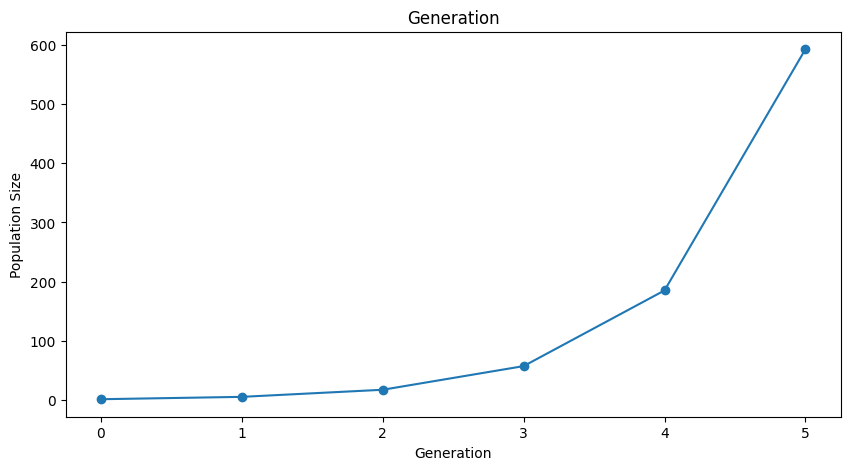

In [374]:
# Lets create a graph of the generations!

generations = range(len(cell_growth))
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(generations, cell_growth, marker='o')  # Plot x and y using a line plot with markers

# Adding labels and title
plt.xlabel('Generation')
plt.ylabel('Population Size')
plt.title('Generation')

# Show the plot
plt.show()

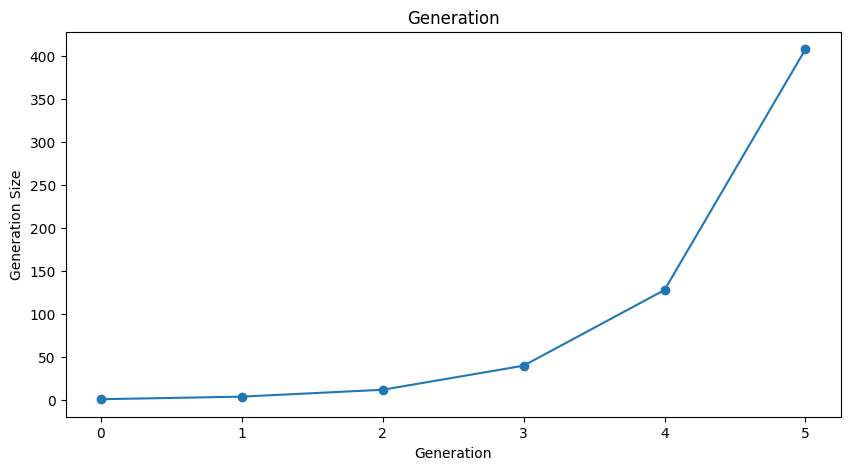

In [375]:
generations = range(len(generation_size))
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(generations, generation_size, marker='o')  # Plot x and y using a line plot with markers

# Adding labels and title
plt.xlabel('Generation')
plt.ylabel('Generation Size')
plt.title('Generation')

# Show the plot
plt.show()

In [501]:
cell_params = [
    {"chromo_length" : 50, "ave_gene_length" : 5, "chromo_count" : 2}
]
testing_cell = cell_functions.create_basic_cell(cell_params, uuid.uuid1())


#cell_functions.recombinate_random_chromatid(first_cell)

In [502]:
testing_cell.sequence_str()
print(testing_cell)
print(testing_cell.sister_chromatids)
print(testing_cell.sister_chromatids[0].chromosomes)
print(testing_cell.sister_chromatids[0].chromosomes[0].genes)
print(testing_cell.sister_chromatids[0].chromosomes[0].genes[0].sequence)

[<chromosome_class.chromosome object at 0x235e8cd00>, <chromosome_class.chromosome object at 0x235e8c9a0>]
[<short_DNA_region_class.gene object at 0x237738f40>, <short_DNA_region_class.gene object at 0x237738550>, <short_DNA_region_class.gene object at 0x184fc5e50>, <short_DNA_region_class.gene object at 0x154b1f190>, <short_DNA_region_class.gene object at 0x154b1fc40>, <short_DNA_region_class.gene object at 0x239023a60>, <short_DNA_region_class.gene object at 0x239023700>, <short_DNA_region_class.gene object at 0x2390234c0>]
[<bp_class.Bp object at 0x237738fa0>, <bp_class.Bp object at 0x2377386d0>, <bp_class.Bp object at 0x237738820>, <bp_class.Bp object at 0x237738e50>, <bp_class.Bp object at 0x237738220>]


In [503]:
#testing_cell.sister_chromatids[0].chromosomes[0].genes[0] = gene([Bp('a'), Bp('a'), Bp('a')])
#testing_cell.sequence_str()

In [504]:
#print(testing_cell.sister_chromatids[0].chromosomes)
print(testing_cell.sister_chromatids[0].chromosomes)
cell_functions.recombinate_random_chromatid(testing_cell)
#testing_cell.sequence_str()



[[['c', 'a', 'a', 'a', 'a', 'g', 'g', 'c', 't', 'a', 'g', 'c', 'g', 'c', 't', 'c', 't', 'g', 'a', 't', 'a', 't', 't', 'c', 'g', 't', 'a', 'g', 'c', 't', 'a', 'g', 'a', 't', 'g', 'g', 'a', 'a', 'a', 't', 't', 'c', 't', 'a'], ['c', 'a', 'a', 'a', 'a', 'g', 'g', 'c', 't', 'a', 'g', 'c', 'g', 'c', 't', 'c', 't', 'g', 'a', 't', 'a', 't', 't', 'c', 'g', 't', 'a', 'g', 'c', 't', 'a', 'g', 'a', 't', 'g', 'g', 'a', 'a', 'a', 't', 't', 'c', 't', 'a']]]
[<short_DNA_region_class.gene object at 0x237738f40>, <short_DNA_region_class.gene object at 0x237738550>, <short_DNA_region_class.gene object at 0x184fc5e50>, <short_DNA_region_class.gene object at 0x154b1f190>, <short_DNA_region_class.gene object at 0x154b1fc40>, <short_DNA_region_class.gene object at 0x239023a60>, <short_DNA_region_class.gene object at 0x239023700>, <short_DNA_region_class.gene object at 0x2390234c0>]
[<short_DNA_region_class.gene object at 0x150dfaaf0>, <short_DNA_region_class.gene object at 0x150dfa2b0>, <short_DNA_region_cla

[[['c',
   'a',
   'a',
   'a',
   'a',
   'g',
   'g',
   'c',
   't',
   'a',
   'A',
   'A',
   'A',
   'A',
   'g',
   'a',
   't',
   'a',
   't',
   't',
   'c',
   'g',
   't',
   'a',
   'g',
   'c',
   't',
   'a',
   'g',
   'a',
   't',
   'g',
   'g',
   'a',
   'a',
   'a',
   't',
   't',
   'c',
   't',
   'a']]]

In [505]:
testing_cell.sister_chromatids[0].chromosomes
